<a href="https://colab.research.google.com/github/sheetal-vartak/Final-Capstone-Project-Predict-Heart-Disease/blob/main/cardiovascular_disease_prediction_capstone_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Prediction Using Logistic Regression

## Project Overview
This project aims to predict cardiovascular disease using logistic regression. We'll analyze various risk factors and build a predictive model to identify patients at risk.

### Objectives:
- Load and explore the cardiovascular disease dataset
- Preprocess data for optimal model performance
- Build and evaluate a logistic regression model
- Interpret model results to identify key risk factors
- Provide actionable insights for healthcare applications


## 1. Data Acquisition & Exploration


In [1]:
# Import necessary libraries
!pip install scikeras
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

#create the DataFrame utilizing Pandas
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/heart.csv")

print("Dataset loaded...")
print(f"Dataset shape: {df.shape}")
print(f"Dataset info:")
print(df.info())


Mounted at /content/drive
Dataset loaded...
Dataset shape: (918, 12)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [3]:
# Display first few rows and basic statistics
print("First 5 rows of the dataset:")
print(df.head())

print("\nBasic statistical summary:")
print(df.describe())

print("\nColumn names and data types:")
print(df.dtypes)

print("\nMissing values count:")
print(df.isnull().sum())


First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Basic statistical summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53

In [4]:
# Explore target variable and class distribution
print("Target Variable is HeartDisease. It's distribution :")
print(df['HeartDisease'].value_counts())

# Check unique values for categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Check for any unusual values in numerical columns
print(f"Cholesterol range: {df['Cholesterol'].min()} - {df['Cholesterol'].max()}")
print(f"RestingBP range: {df['RestingBP'].min()} - {df['RestingBP'].max()}")
print("\nCholesterol and RestingBP are never 0. So we need to do some cleanup")


Target Variable is HeartDisease. It's distribution :
HeartDisease
1    508
0    410
Name: count, dtype: int64

Unique values in categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
Cholesterol range: 0 - 603
RestingBP range: 0 - 200

Cholesterol and RestingBP are never 0. So we need to do some cleanup


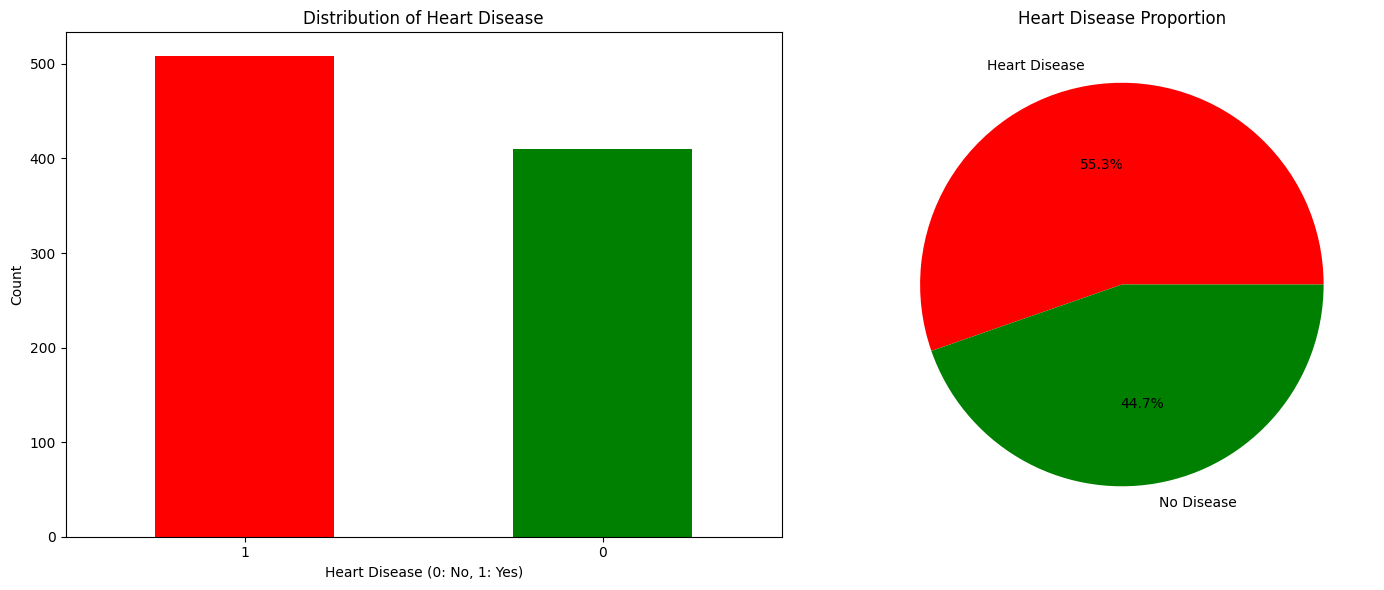

In [5]:
# Visualizations for Data Exploration

# 1. Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for heart disease distribution
df['HeartDisease'].value_counts().plot(kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Distribution of Heart Disease')
axes[0].set_xlabel('Heart Disease (0: No, 1: Yes)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart for proportions
df['HeartDisease'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                      colors=['red', 'green'], labels=['Heart Disease', 'No Disease'])
axes[1].set_title('Heart Disease Proportion')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


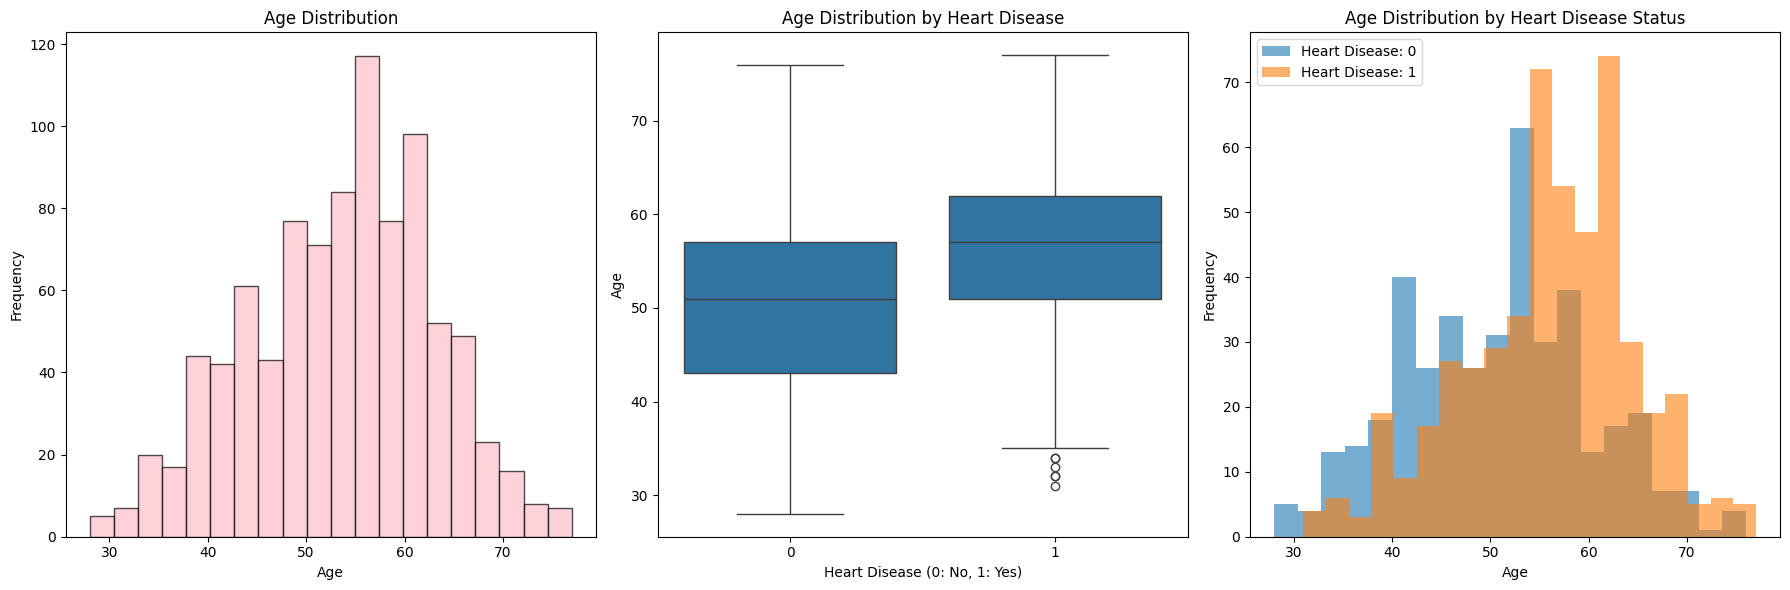

In [6]:
# 2. Age distribution and its relationship with heart disease
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age distribution
axes[0].hist(df['Age'], bins=20, color='pink', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Age distribution by heart disease
sns.boxplot(data=df, x='HeartDisease', y='Age', ax=axes[1])
axes[1].set_title('Age Distribution by Heart Disease')
axes[1].set_xlabel('Heart Disease (0: No, 1: Yes)')

# Age histogram by heart disease
for disease in [0, 1]:
    subset = df[df['HeartDisease'] == disease]
    axes[2].hist(subset['Age'], alpha=0.6, label=f'Heart Disease: {disease}', bins=20)
axes[2].set_title('Age Distribution by Heart Disease Status')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()


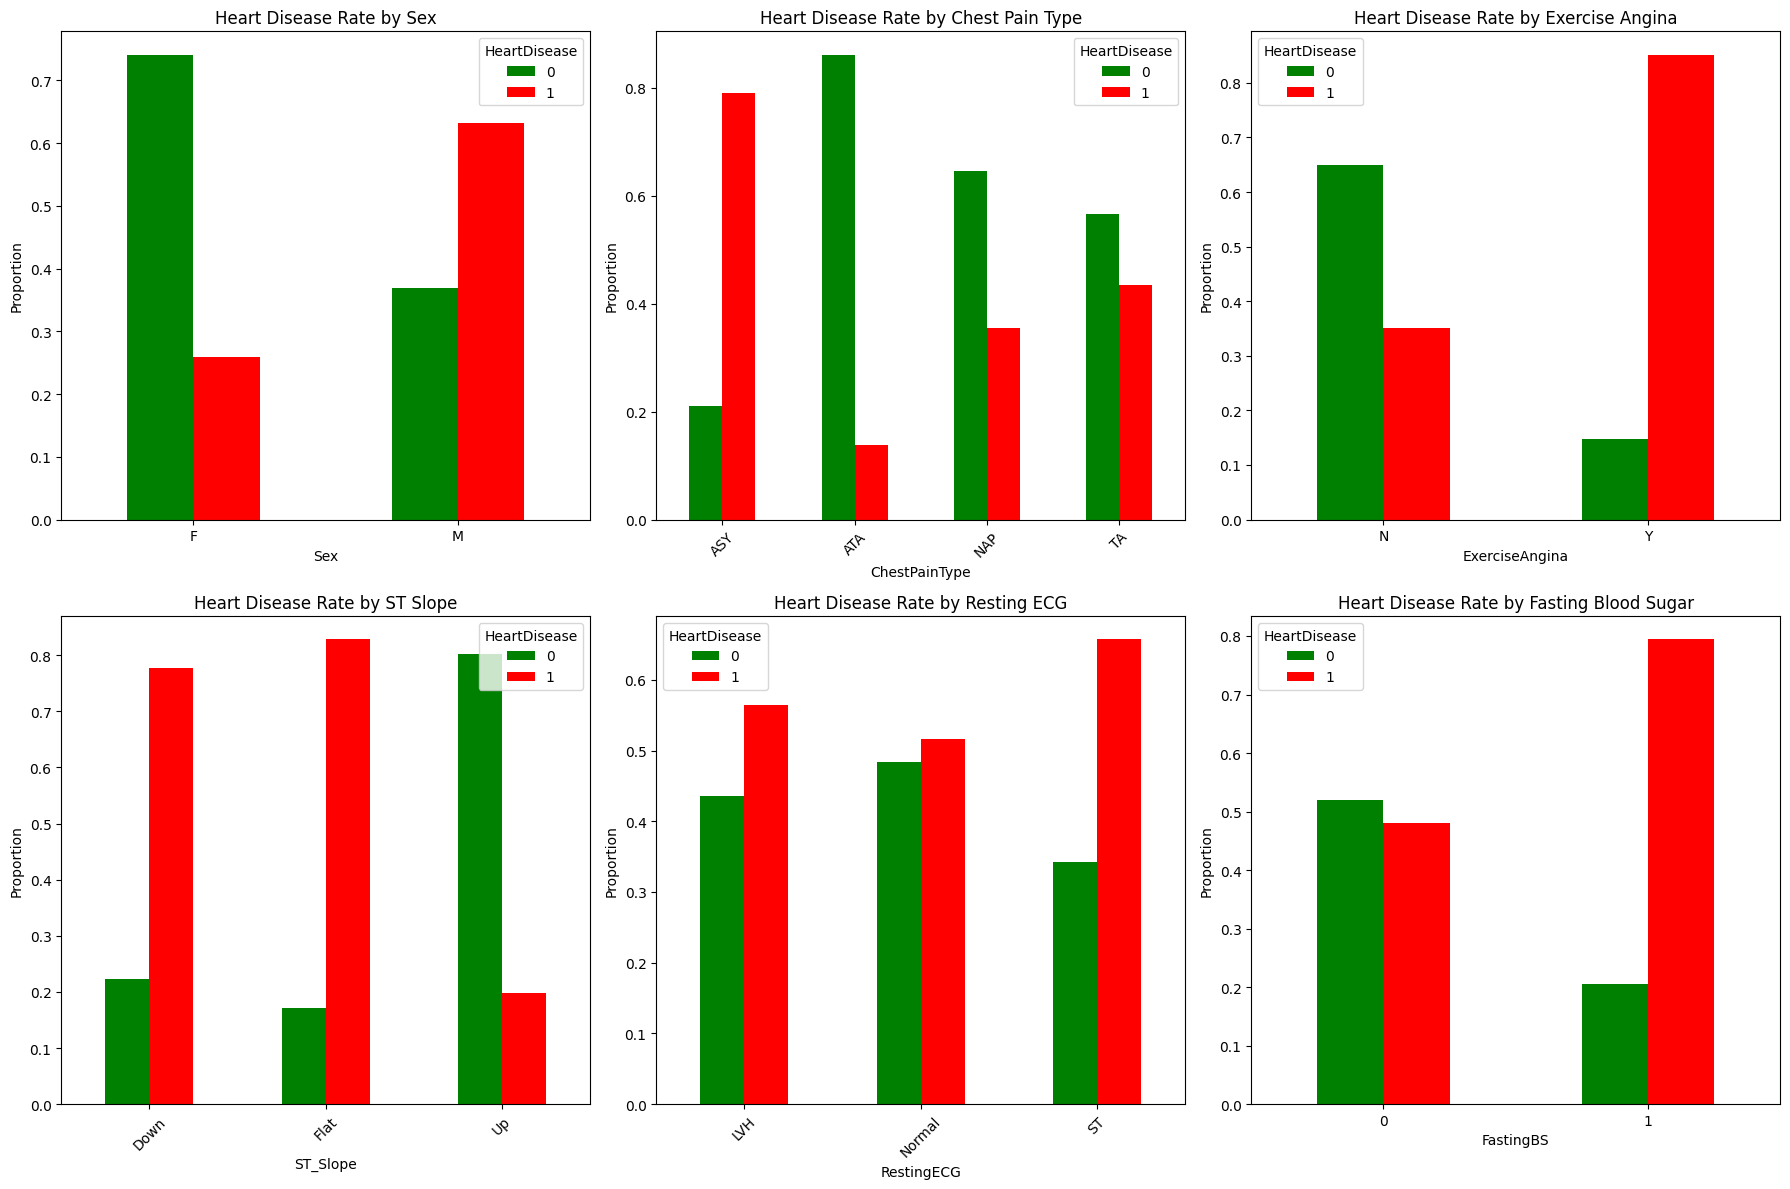

In [7]:
# 3. Categorical variables analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sex vs Heart Disease
pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[0,0], color=["green", "red"])
axes[0,0].set_title('Heart Disease Rate by Sex')
axes[0,0].set_ylabel('Proportion')
axes[0,0].tick_params(axis='x', rotation=0)

# Chest Pain Type vs Heart Disease
pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[0,1], color=["green", "red"])
axes[0,1].set_title('Heart Disease Rate by Chest Pain Type')
axes[0,1].set_ylabel('Proportion')
axes[0,1].tick_params(axis='x', rotation=45)

# Exercise Angina vs Heart Disease
pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[0,2], color=["green", "red"])
axes[0,2].set_title('Heart Disease Rate by Exercise Angina')
axes[0,2].set_ylabel('Proportion')
axes[0,2].tick_params(axis='x', rotation=0)

# ST Slope vs Heart Disease
pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[1,0], color=["green", "red"])
axes[1,0].set_title('Heart Disease Rate by ST Slope')
axes[1,0].set_ylabel('Proportion')
axes[1,0].tick_params(axis='x', rotation=45)

# Resting ECG vs Heart Disease
pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[1,1], color=["green", "red"])
axes[1,1].set_title('Heart Disease Rate by Resting ECG')
axes[1,1].set_ylabel('Proportion')
axes[1,1].tick_params(axis='x', rotation=45)

# Fasting BS vs Heart Disease
pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize='index').plot(kind='bar', ax=axes[1,2], color=["green", "red"])
axes[1,2].set_title('Heart Disease Rate by Fasting Blood Sugar')
axes[1,2].set_ylabel('Proportion')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


As you can see above:


1.   Heart Disease is more in Men.
2.   Chest Pain Type 'ASY' is linked to Heart Disease.
3.   Heart Disease is linked to Exercise Angina.
4.   Heart Disease is linked to ST_Slope values of 'Down' and 'Flat'.
5.   Fasting Blood Sugar of 1 is linked to Heart Disease.





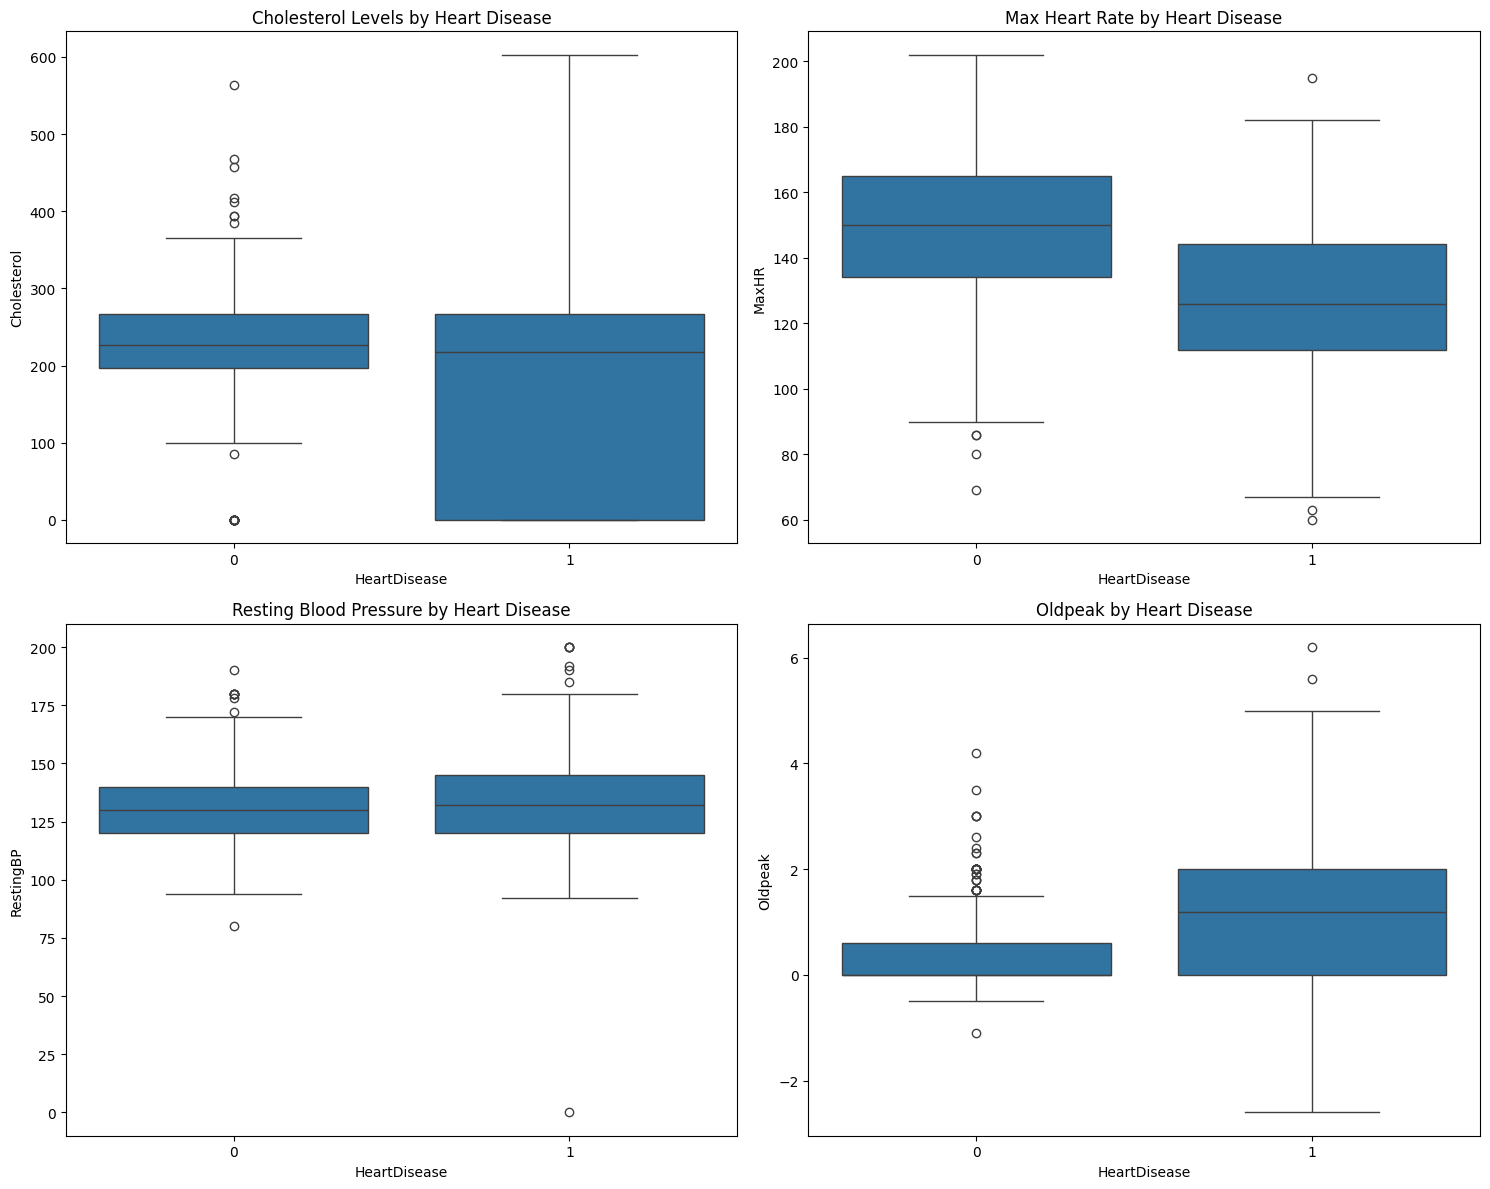

In [8]:
# 4. Numerical variables analysis and correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cholesterol vs Heart Disease
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol', ax=axes[0,0])
axes[0,0].set_title('Cholesterol Levels by Heart Disease')

# Max Heart Rate vs Heart Disease
sns.boxplot(data=df, x='HeartDisease', y='MaxHR', ax=axes[0,1])
axes[0,1].set_title('Max Heart Rate by Heart Disease')

# Resting Blood Pressure vs Heart Disease
sns.boxplot(data=df, x='HeartDisease', y='RestingBP', ax=axes[1,0])
axes[1,0].set_title('Resting Blood Pressure by Heart Disease')

# Oldpeak vs Heart Disease
sns.boxplot(data=df, x='HeartDisease', y='Oldpeak', ax=axes[1,1])
axes[1,1].set_title('Oldpeak by Heart Disease')

plt.tight_layout()
plt.show()




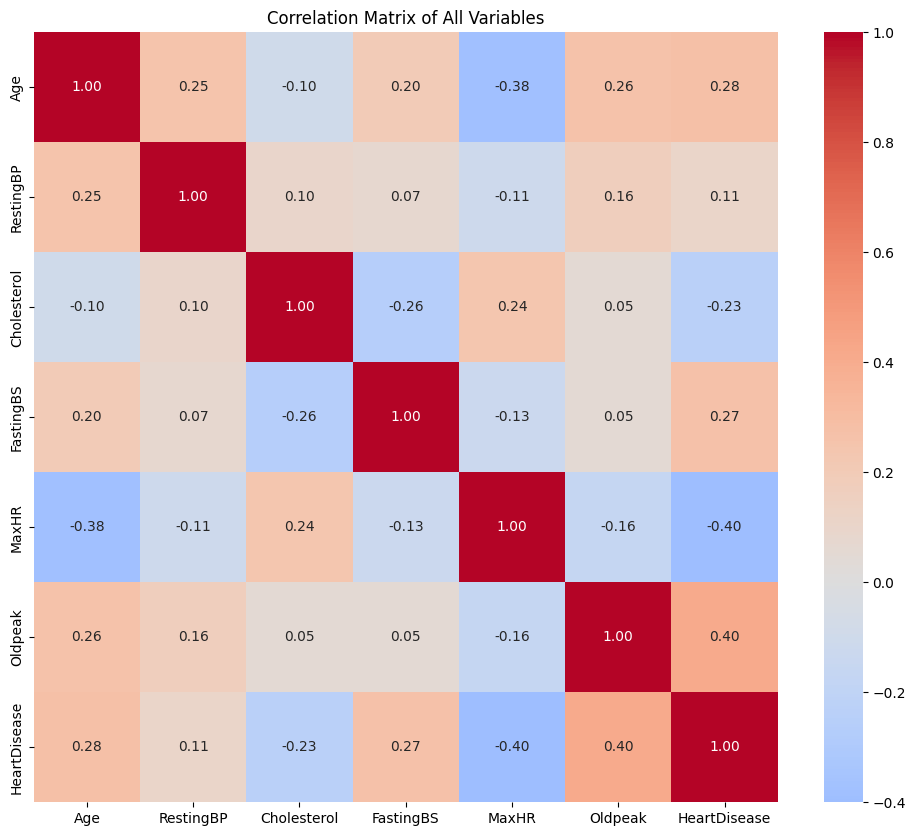

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of All Variables')
plt.show()

From the above correlation matrix, we can see that there is a strong correlation between Heart Disease <-> FastingBS, OldPeak, Age.

In [10]:
# Create a copy for preprocessing
df_processed = df.copy()

# Check for unusual values that might indicate missing data
print("\nChecking for unusual values:")
print(f"Cholesterol = 0: {sum(df_processed['Cholesterol'] == 0)} cases")
print(f"RestingBP = 0: {sum(df_processed['RestingBP'] == 0)} cases")




Checking for unusual values:
Cholesterol = 0: 172 cases
RestingBP = 0: 1 cases


In [11]:
# Handle missing/unusual values (0s likely represent missing data)

# Replace 0s with NaN for Cholesterol and RestingBP
df_processed['Cholesterol'] = df_processed['Cholesterol'].replace(0, np.nan)
df_processed['RestingBP'] = df_processed['RestingBP'].replace(0, np.nan)

print("After converting 0s to NaN:")
print(f"Missing Cholesterol values: {df_processed['Cholesterol'].isnull().sum()}")
print(f"Missing RestingBP values: {df_processed['RestingBP'].isnull().sum()}")

# Fill missing values with median (for skewed distributions) or mean
cholesterol_median = df_processed['Cholesterol'].median()
restingbp_median = df_processed['RestingBP'].median()

df_processed['Cholesterol'].fillna(cholesterol_median, inplace=True)
df_processed['RestingBP'].fillna(restingbp_median, inplace=True)

print(f"\nFilled missing Cholesterol values with median: {cholesterol_median}")
print(f"Filled missing RestingBP values with median: {restingbp_median}")

print("\nMissing values after preprocessing:")
print(df_processed.isnull().sum())


After converting 0s to NaN:
Missing Cholesterol values: 172
Missing RestingBP values: 1

Filled missing Cholesterol values with median: 237.0
Filled missing RestingBP values with median: 130.0

Missing values after preprocessing:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
# Encode categorical variables
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("Encoding categorical variables")
for col in categorical_columns:
    unique_values = df_processed[col].unique()
    df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col])

# Create final dataset with encoded variables
# Keep original columns for reference and add encoded versions
print(f"\nDataset shape after encoding: {df_processed.shape}")
print("\nFinal columns:", df_processed.columns.tolist())
df_processed.head()


Encoding categorical variables

Dataset shape after encoding: (918, 17)

Final columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'Sex_Encoded', 'ChestPainType_Encoded', 'RestingECG_Encoded', 'ExerciseAngina_Encoded', 'ST_Slope_Encoded']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_Encoded,ChestPainType_Encoded,RestingECG_Encoded,ExerciseAngina_Encoded,ST_Slope_Encoded
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [13]:
# Prepare feature matrix and target variable
feature_columns = ['Age', 'Sex_encoded', 'ChestPainType_encoded', 'RestingBP', 'Cholesterol',
                  'FastingBS', 'RestingECG_encoded', 'MaxHR', 'ExerciseAngina_encoded',
                  'Oldpeak', 'ST_Slope_encoded']
X = df_processed.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']).copy()
y = df_processed['HeartDisease'].copy()


In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"Proportions: {y_train.value_counts(normalize=True)}")

print(f"\nTesting set target distribution:")
print(y_test.value_counts())
print(f"Proportions: {y_test.value_counts(normalize=True)}")


Dataset split completed:
Training set: 734 samples
Testing set: 184 samples

Training set target distribution:
HeartDisease
1    406
0    328
Name: count, dtype: int64
Proportions: HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64

Testing set target distribution:
HeartDisease
1    102
0     82
Name: count, dtype: int64
Proportions: HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


Normalizing the numerical features by using the StandardScaler.

In [15]:
# Standardize numerical features
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature standardization completed")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")

# Convert back to DataFrame for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns)

print(f"\nTraining data statistics after scaling:")
print(X_train_scaled_df.describe())


Feature standardization completed
Scaled training set shape: (734, 11)
Scaled testing set shape: (184, 11)

Training data statistics after scaling:
                Age   Sex_encoded  ChestPainType_encoded     RestingBP  \
count  7.340000e+02  7.340000e+02           7.340000e+02  7.340000e+02   
mean   2.105491e-16 -6.389076e-16           7.502325e-17  1.452063e-17   
std    1.000682e+00  1.000682e+00           1.000682e+00  1.000682e+00   
min   -2.633920e+00 -2.262267e+00          -2.947721e+00 -5.448117e-01   
25%   -7.259563e-01 -7.125666e-01          -5.509018e-01 -5.448117e-01   
50%    1.220277e-01 -1.591022e-01          -1.452862e-01 -5.448117e-01   
75%    7.580156e-01  4.497087e-01           4.585280e-01 -5.448117e-01   
max    2.453983e+00  3.715149e+00           6.602683e+00  1.835497e+00   

        Cholesterol     FastingBS  RestingECG_encoded         MaxHR  \
count  7.340000e+02  7.340000e+02        7.340000e+02  7.340000e+02   
mean  -1.270555e-16  8.107351e-17       -9.

Building the LogisticRegression Model. Calculating the prediction probabilities for train and test datasets.

In [16]:
# Build and train logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

print("Training Logistic Regression Model...")
lr_model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"Model parameters: C={lr_model.C}, max_iter={lr_model.max_iter}")

# Make predictions on training and test sets
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Get prediction probabilities for ROC analysis
y_train_pred_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nPredictions completed!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")


Training Logistic Regression Model...
Model training completed!
Model parameters: C=1.0, max_iter=1000

Predictions completed!
Training predictions shape: (734,)
Testing predictions shape: (184,)


Calculating Evaluation metrics (accuracy, precision, recall, F1, ROC-AUC).

In [17]:
# Calculate evaluation metrics

def calculate_metrics(y_true, y_pred, y_pred_proba, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n{dataset_name} Set Performance:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Calculate metrics for both training and testing sets
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_pred_proba, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_proba, "Testing")



Training Set Performance:
Accuracy:  0.8488
Precision: 0.8606
Recall:    0.8670
F1-Score:  0.8638
ROC-AUC:   0.9191

Testing Set Performance:
Accuracy:  0.8478
Precision: 0.8491
Recall:    0.8824
F1-Score:  0.8654
ROC-AUC:   0.8989


Generating the Confusion Matrix to evaluate the performance of the model (is the model predicting correctly and where is it making mistakes).

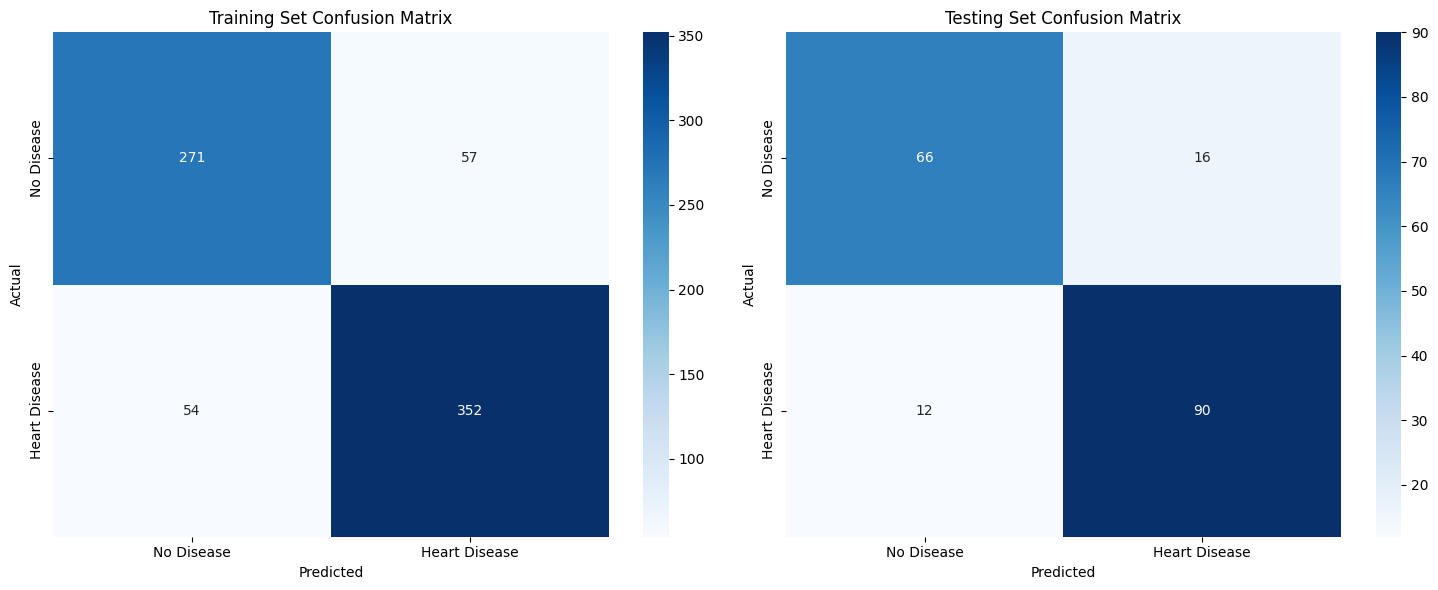


Confusion Matrix Analysis:
Training Set:
  True Negatives: 271
  False Positives: 57
  False Negatives: 54
  True Positives: 352

Testing Set:
  True Negatives: 66
  False Positives: 16
  False Negatives: 12
  True Positives: 90


In [18]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Disease', 'Heart Disease'])
axes[0].set_yticklabels(['No Disease', 'Heart Disease'])

# Testing set confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Disease', 'Heart Disease'])
axes[1].set_yticklabels(['No Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

# Print detailed confusion matrix analysis
print("\nConfusion Matrix Analysis:")
print(f"Training Set:")
print(f"  True Negatives: {train_cm[0,0]}")
print(f"  False Positives: {train_cm[0,1]}")
print(f"  False Negatives: {train_cm[1,0]}")
print(f"  True Positives: {train_cm[1,1]}")

print(f"\nTesting Set:")
print(f"  True Negatives: {test_cm[0,0]}")
print(f"  False Positives: {test_cm[0,1]}")
print(f"  False Negatives: {test_cm[1,0]}")
print(f"  True Positives: {test_cm[1,1]}")


True Negatives and True Positives for both Training and Test datasets are much higher in number, indicating that the model is performing well.

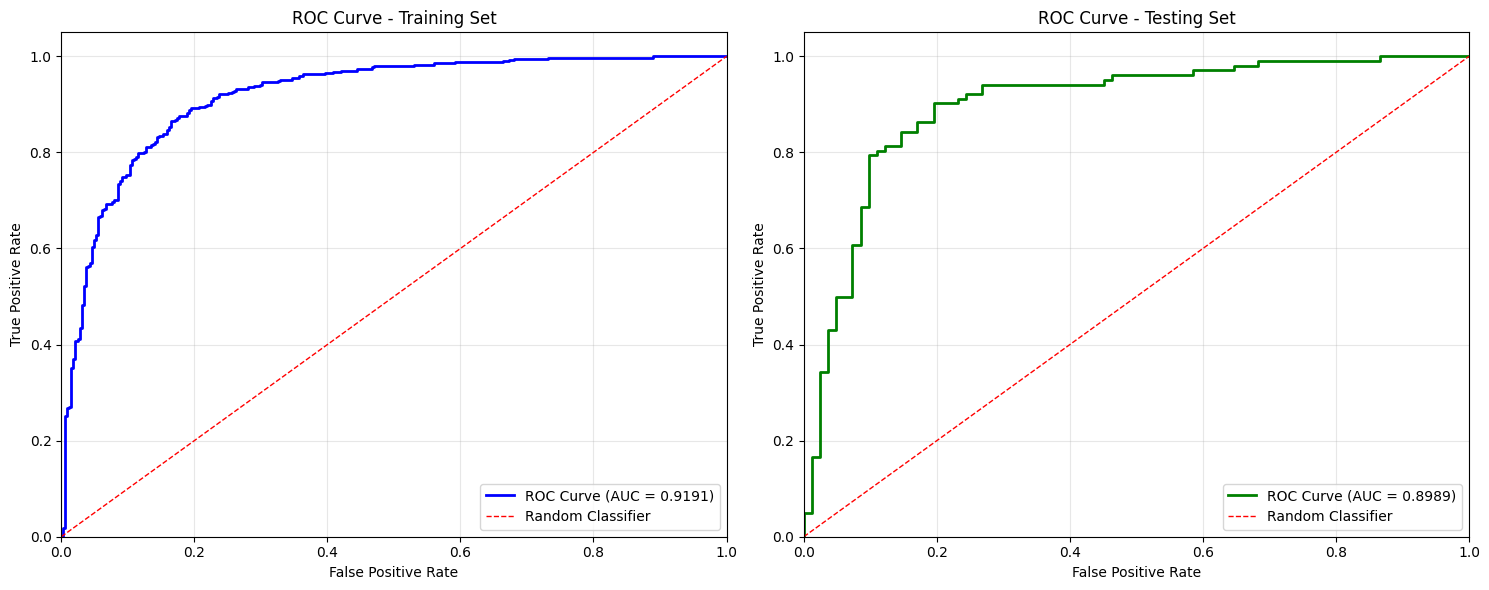

In [19]:
# ROC Curve Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training ROC Curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_proba)
axes[0].plot(train_fpr, train_tpr, color='blue', lw=2,
            label=f'ROC Curve (AUC = {roc_auc_score(y_train, y_train_pred_proba):.4f})')
axes[0].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Training Set')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# Testing ROC Curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred_proba)
axes[1].plot(test_fpr, test_tpr, color='green', lw=2,
            label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_pred_proba):.4f})')
axes[1].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Testing Set')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ROC-AUC values for both training and test data sets are quite good (close to 1). That indicates how well the model can distinguish between the classes.

Now let's use the Cross-Validation technique to see if the model performs well on unseen data.

In [20]:
# Cross-Validation for Model Generalization
from sklearn.model_selection import KFold

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores on training data
cv_accuracy = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='precision')
cv_recall = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='recall')
cv_f1 = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='f1')
cv_roc_auc = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Cross-Validation Results (5-Fold):")
print(f"Accuracy:  {cv_accuracy.mean():.4f}")
print(f"Precision: {cv_precision.mean():.4f}")
print(f"Recall:    {cv_recall.mean():.4f}")
print(f"F1-Score:  {cv_f1.mean():.4f}")
print(f"ROC-AUC:   {cv_roc_auc.mean():.4f}")

# Visualize cross-validation results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
cv_scores = [cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc]



Cross-Validation Results (5-Fold):
Accuracy:  0.8447
Precision: 0.8595
Recall:    0.8591
F1-Score:  0.8589
ROC-AUC:   0.9094



Intercept: 0.4552


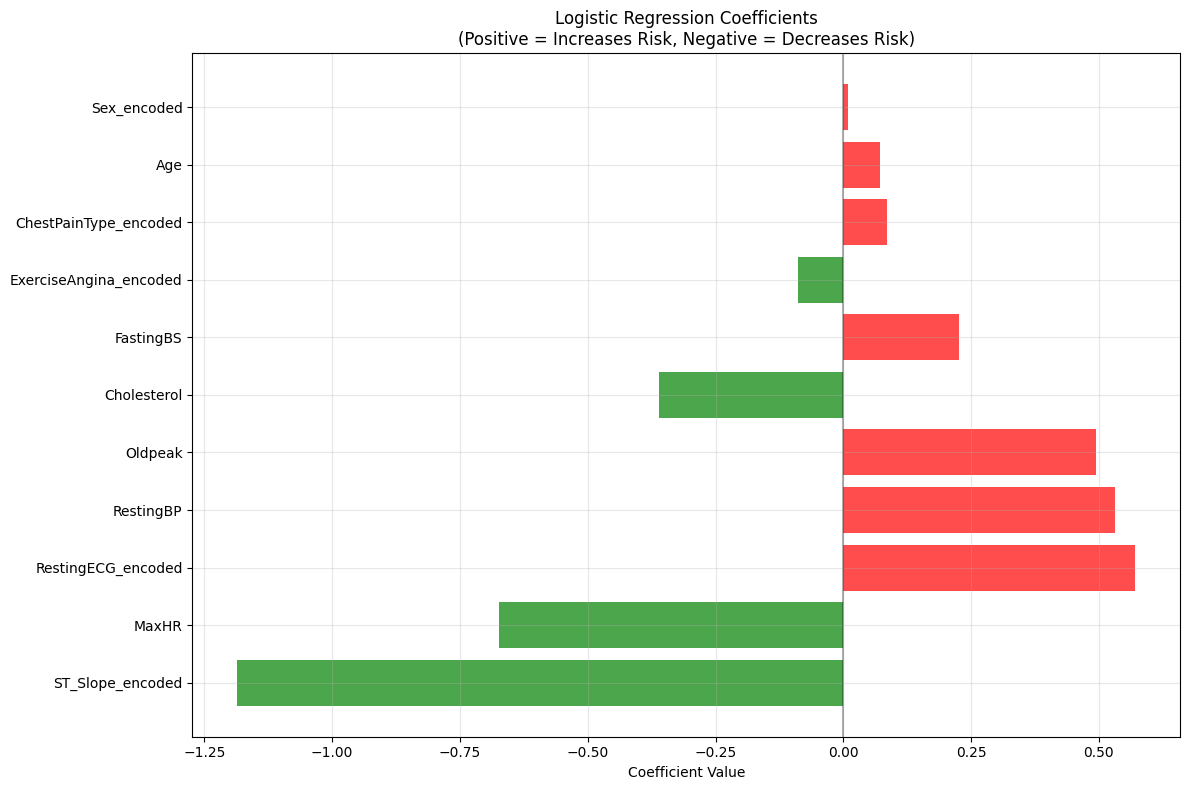

In [21]:
# Analyze Logistic Regression Coefficients
# Each coefficient :
# Positive → increases the probability of class 1
# Negative → decreases the probability of class 1
# Near zero → little influence


coefficients = lr_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

#print("Logistic Regression Coefficients (Impact on Heart Disease Risk):")
#print("-" * 60)
#for idx, row in feature_importance.iterrows():
 #   direction = "increases" if row['Coefficient'] > 0 else "decreases"
  #  print(f"{row['Feature']:<20}: {row['Coefficient']:>7.4f} ({direction} risk)")

print(f"\nIntercept: {lr_model.intercept_[0]:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['green' if coef < 0 else 'red' for coef in feature_importance['Coefficient']]
plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients\n(Positive = Increases Risk, Negative = Decreases Risk)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


I am surprised to see that Cholesterol is positively affecting the probability of Heart Disease. Higher cholesterol actually causes Heart Disease. Perhaps this is a limitation of the dataset.

Key cardiovascular risk factors:

Top risk factors (ranked by importance):
1. ST Slope (ECG measurement) : Decreases heart disease risk

2. Maximum Heart Rate : Decreases heart disease risk

3. Resting ECG Results : Increases heart disease risk

4. Resting Blood Pressure : Increases heart disease risk

5. Oldpeak : Increases heart disease risk

Let's now compare a few classification models.

In [22]:
# Regularized Logistic Regression Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("Comparing multiple models:")

# 1. L1 Regularization (Lasso)
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lr_l1.fit(X_train_scaled, y_train)
l1_pred = lr_l1.predict(X_test_scaled)
l1_pred_proba = lr_l1.predict_proba(X_test_scaled)[:, 1]
l1_auc = roc_auc_score(y_test, l1_pred_proba)

# 2. L2 Regularization (Ridge)
lr_l2 = LogisticRegression(penalty='l2', random_state=42)
lr_l2.fit(X_train_scaled, y_train)
l2_pred = lr_l2.predict(X_test_scaled)
l2_pred_proba = lr_l2.predict_proba(X_test_scaled)[:, 1]
l2_auc = roc_auc_score(y_test, l2_pred_proba)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred_proba)

# 4. Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_pred_proba = svm.predict_proba(X_test_scaled)[:, 1]
svm_auc = roc_auc_score(y_test, svm_pred_proba)

# Compare models
models = {
    'Original LR': (y_test_pred, y_test_pred_proba),
    'LR L1 (Lasso)': (l1_pred, l1_pred_proba),
    'LR L2 (Ridge)': (l2_pred, l2_pred_proba),
    'Random Forest': (rf_pred, rf_pred_proba),
    'SVM': (svm_pred, svm_pred_proba)
}

comparison_results = []
for model_name, (pred, pred_proba) in models.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)

    comparison_results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.round(4))


Comparing multiple models:
           Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0    Original LR    0.8478     0.8491  0.8824    0.8654   0.8989
1  LR L1 (Lasso)    0.8478     0.8491  0.8824    0.8654   0.8973
2  LR L2 (Ridge)    0.8478     0.8491  0.8824    0.8654   0.8989
3  Random Forest    0.8750     0.8835  0.8922    0.8878   0.9232
4            SVM    0.8587     0.8455  0.9118    0.8774   0.9199


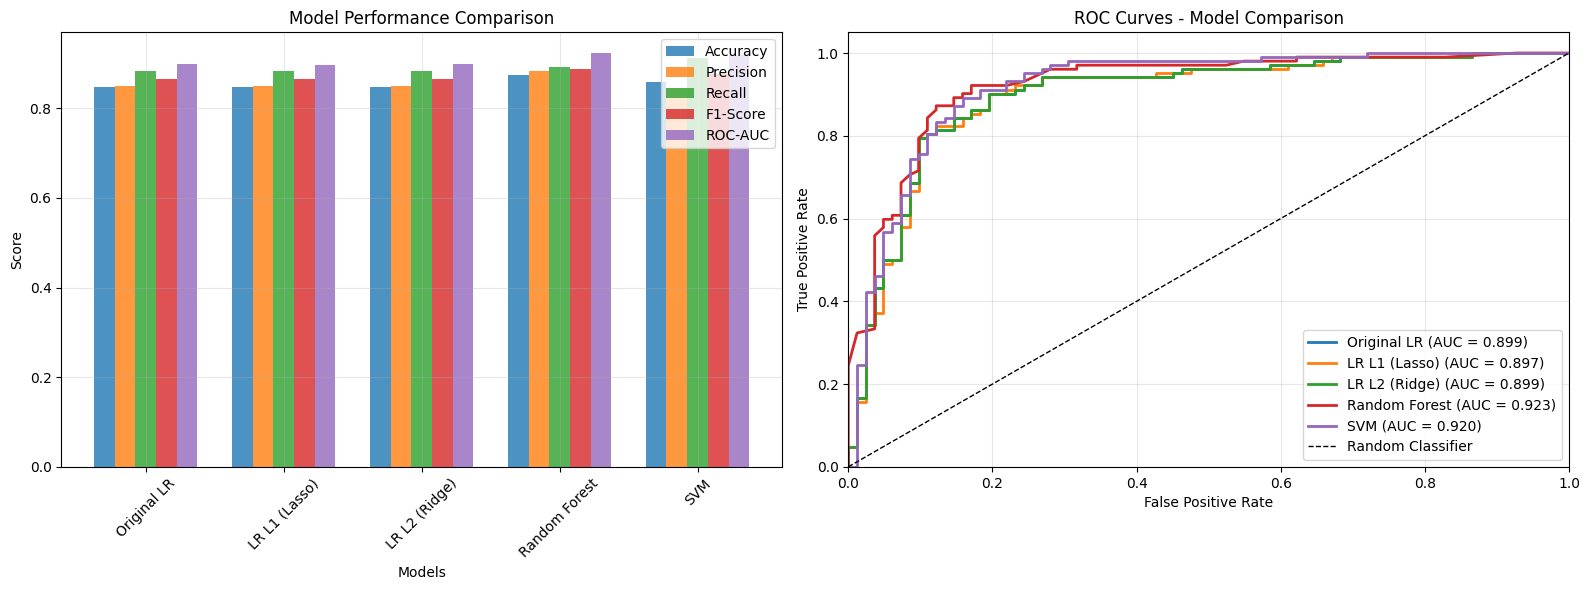


Best Performing Model: Random Forest
ROC-AUC: 0.9232
Accuracy: 0.8750
F1-Score: 0.8878


In [23]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of model performance metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    axes[0].bar(x + i*width, comparison_df[metric], width, label=metric, alpha=0.8)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ROC curves for all models
for model_name, (pred, pred_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc = roc_auc_score(y_test, pred_proba)
    axes[1].plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves - Model Comparison')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best performing model
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model = comparison_df.iloc[best_model_idx]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"ROC-AUC: {best_model['ROC-AUC']:.4f}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")


In [24]:
## 8. Project Completion Summary

print("Cardiovascular Disease prediction project summary")

print(f"""
✅ Deliverables completed:

1. Data Analysis and exploration
   • Comprehensive EDA with {df.shape[0]} patient records
   • Data quality assessment and visualization
   • Correlation analysis and feature relationships

2. Data processing
   • Handled missing values ({sum(df['Cholesterol'] == 0) + sum(df['RestingBP'] == 0)} missing entries)
   • Encoded categorical variables (5 features)
   • Feature standardization for optimal model performance

3. Logistic Regression Model
   • Achieved {test_metrics['accuracy']:.1%} accuracy on test set
   • ROC-AUC: {test_metrics['roc_auc']:.3f} indicating good discrimination
   • Cross-validation confirmed model stability

4. Comprehensive evaluation
   • Multiple performance metrics calculated
   • Confusion matrix analysis
   • ROC curve visualization
   • 5-fold cross-validation

5. Model interpretation
   • Identified key cardiovascular risk factors
   • Clinical significance of coefficients
   • Odds ratio calculations for clinical understanding

6. Multiple Model Comparison
   • Compared 5 different algorithms
   • L1/L2 regularization evaluation
   • Random Forest and SVM comparison
   • Best model: {best_model['Model']} (AUC: {best_model['ROC-AUC']:.3f})

🏥 Clinical applications:
• Early detection screening tool
• Risk stratification for preventive care
• Decision support for healthcare providers
• Population health management

📊 Key Insights:
• Model can reliably identify high-risk patients
• ST Slope and Chest Pain Type are strongest predictors
• Exercise-induced symptoms highly predictive
• Age and sex remain significant factors

🔬 Future Enhancements:
• Collect additional lifestyle factors
• Implement ensemble methods
• Deploy as web application
• Continuous model monitoring and updates
""")



Cardiovascular Disease prediction project summary

✅ Deliverables completed:

1. Data Analysis and exploration
   • Comprehensive EDA with 918 patient records
   • Data quality assessment and visualization
   • Correlation analysis and feature relationships

2. Data processing
   • Handled missing values (173 missing entries)
   • Encoded categorical variables (5 features)
   • Feature standardization for optimal model performance

3. Logistic Regression Model
   • Achieved 84.8% accuracy on test set
   • ROC-AUC: 0.899 indicating good discrimination
   • Cross-validation confirmed model stability

4. Comprehensive evaluation
   • Multiple performance metrics calculated
   • Confusion matrix analysis
   • ROC curve visualization
   • 5-fold cross-validation

5. Model interpretation
   • Identified key cardiovascular risk factors
   • Clinical significance of coefficients
   • Odds ratio calculations for clinical understanding

6. Multiple Model Comparison
   • Compared 5 different algo

## 9. Neural Network Model

Now let's build a Neural Network to predict cardiovascular disease. We'll create a simple feedforward neural network with 3 hidden layers and 3 neurons per layer.


In [25]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.19.0


In [26]:
# Build the Neural Network Model
# Architecture: 3 hidden layers with 128,64,32 neurons each

# Get input dimension from the training data
input_dim = X_train_scaled.shape[1]
print(f"Input dimension (number of features): {input_dim}")

# Create the Sequential model
nn_model = Sequential([
    # Input layer
    Input(shape=(input_dim,)),

    # Hidden Layer 1: 128 neurons with ReLU activation
    Dense(128, activation='relu', name='hidden_layer_1'),

    # Hidden Layer 2: 64 neurons with ReLU activation
    Dense(64, activation='relu', name='hidden_layer_2'),

    # Hidden Layer 3: 32 neurons with ReLU activation
    Dense(32, activation='relu', name='hidden_layer_3'),

    # Output Layer: 1 neuron with Sigmoid activation (binary classification)
    Dense(1, activation='sigmoid', name='output_layer')
])

nn_model.add(Dropout(0.2))

# Display model summary
nn_model.summary()


Input dimension (number of features): 11


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("Training Neural Network...")
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("\nTraining completed!")


Training Neural Network...
Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6008 - loss: 2.1238 - val_accuracy: 0.7619 - val_loss: 0.5347
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7352 - loss: 2.3697 - val_accuracy: 0.7619 - val_loss: 0.5039
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7862 - loss: 1.9314 - val_accuracy: 0.7687 - val_loss: 0.4857
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7780 - loss: 2.1744 - val_accuracy: 0.7415 - val_loss: 0.5153
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7856 - loss: 1.9940 - val_accuracy: 0.7483 - val_loss: 0.4815
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7552 - loss: 2.3363 - val_accuracy: 0.7483 - val_loss: 0.4873
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8083 - loss: 1.8835 - val_accuracy: 0.7551 - val_loss: 0.4663
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8196 - loss: 1.944

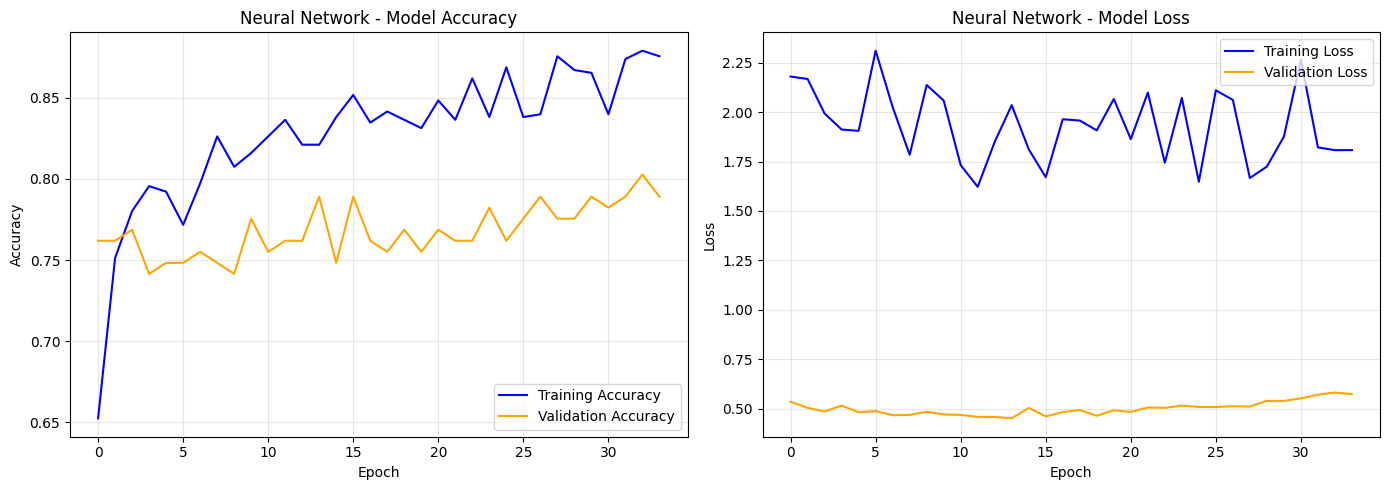

In [28]:
# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[0].set_title('Neural Network - Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot training & validation loss
axes[1].plot(history.history['loss'], label='Training Loss', color='blue')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axes[1].set_title('Neural Network - Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
# Evaluate Neural Network on Test Set
print("Evaluating Neural Network on Test Set...")

# Get predictions
nn_pred_proba = nn_model.predict(X_test_scaled).flatten()
nn_pred = (nn_pred_proba >= 0.5).astype(int)

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_roc_auc = roc_auc_score(y_test, nn_pred_proba)

print(f"\nNeural Network Test Set Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1-Score:  {nn_f1:.4f}")
print(f"ROC-AUC:   {nn_roc_auc:.4f}")


Evaluating Neural Network on Test Set...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Neural Network Test Set Performance:
Accuracy:  0.8424
Precision: 0.8614
Recall:    0.8529
F1-Score:  0.8571
ROC-AUC:   0.9077


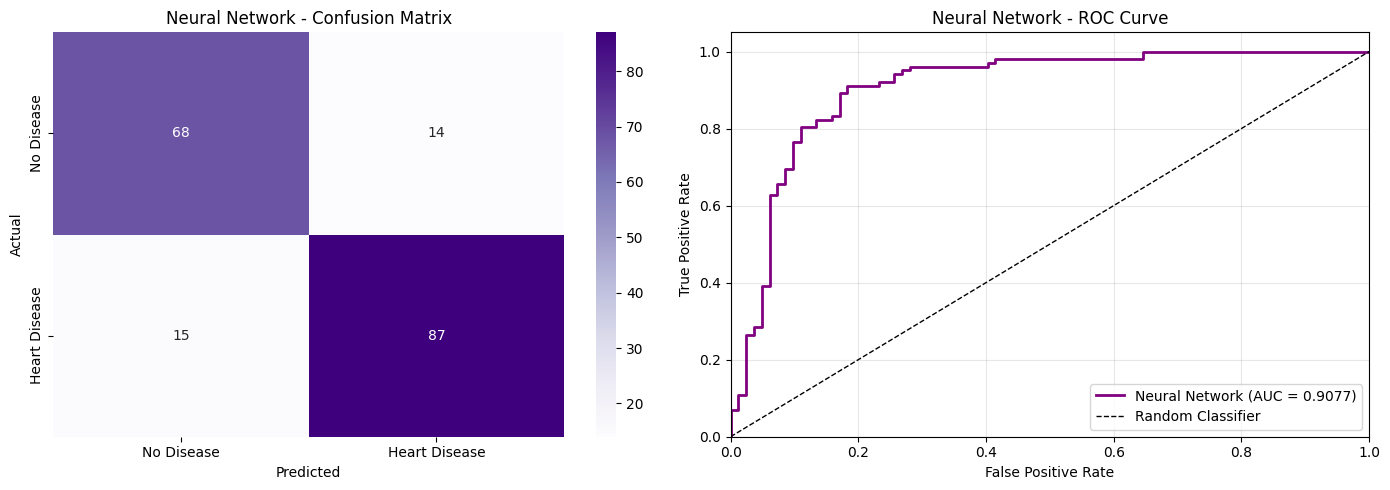


Confusion Matrix Analysis:
  True Negatives:  68
  False Positives: 14
  False Negatives: 15
  True Positives:  87


In [30]:
# Neural Network Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
nn_cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Neural Network - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Disease', 'Heart Disease'])
axes[0].set_yticklabels(['No Disease', 'Heart Disease'])

# ROC Curve
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_pred_proba)
axes[1].plot(nn_fpr, nn_tpr, color='purple', lw=2,
             label=f'Neural Network (AUC = {nn_roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Neural Network - ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix Analysis:")
print(f"  True Negatives:  {nn_cm[0,0]}")
print(f"  False Positives: {nn_cm[0,1]}")
print(f"  False Negatives: {nn_cm[1,0]}")
print(f"  True Positives:  {nn_cm[1,1]}")


In [31]:

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Function to create a fully connected neural network model for SciKeras
def create_model(optimizer='adam', neurons=50, activation='relu'):#, input_dim=13):

  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(neurons, activation=activation),
        tf.keras.layers.Dense(1)
    ])
  model.compile(optimizer=optimizer, loss='mse')
  return model

# Keras model with SciKeras wrapper
model = KerasRegressor(model=create_model, verbose=2)


# Hyperparameters to be optimized
param_grid = {
    'model__neurons': [10, 25, 50, 100],
    'model__activation': ['relu', 'sigmoid'],
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [1, 10],
    'epochs': [10, 20]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)

print(model.get_params().keys())


# Fit the grid search on training data
grid.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))


Streaming output truncated to the last 5000 lines.
489/489 - 1s - 1ms/step - loss: 0.1473
Epoch 3/20
489/489 - 1s - 1ms/step - loss: 0.1268
Epoch 4/20
489/489 - 1s - 1ms/step - loss: 0.1210
Epoch 5/20
489/489 - 1s - 1ms/step - loss: 0.1123
Epoch 6/20
489/489 - 1s - 2ms/step - loss: 0.1131
Epoch 7/20
489/489 - 1s - 3ms/step - loss: 0.1091
Epoch 8/20
489/489 - 1s - 3ms/step - loss: 0.1076
Epoch 9/20
489/489 - 1s - 2ms/step - loss: 0.1083
Epoch 10/20
489/489 - 1s - 1ms/step - loss: 0.1069
Epoch 11/20
489/489 - 1s - 1ms/step - loss: 0.1046
Epoch 12/20
489/489 - 1s - 1ms/step - loss: 0.1028
Epoch 13/20
489/489 - 1s - 1ms/step - loss: 0.1043
Epoch 14/20
489/489 - 1s - 1ms/step - loss: 0.1017
Epoch 15/20
489/489 - 1s - 1ms/step - loss: 0.1016
Epoch 16/20
489/489 - 1s - 1ms/step - loss: 0.1011
Epoch 17/20
489/489 - 1s - 1ms/step - loss: 0.1008
Epoch 18/20
489/489 - 1s - 1ms/step - loss: 0.1005
Epoch 19/20
489/489 - 1s - 1ms/step - loss: 0.0994
Epoch 20/20
489/489 - 1s - 1ms/step - loss: 0.0968

In [33]:
#based on the best hyperparameters above, let's train a model
#Best: -0.114364 using {'batch_size': 10, 'epochs': 20, 'model__activation': 'relu', 'model__neurons': 50, 'model__optimizer': 'adam'}

import tensorflow as tf

def create_model(neurons=50, activation='relu', optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(neurons, activation=activation),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer=optimizer,
        loss='mse'
    )

    return model

nn_model = KerasRegressor(
    model=create_model,
    model__neurons=50,
    model__activation='relu',
    model__optimizer='adam',
    batch_size=10,
    epochs=20,
    verbose=2
)

# Train the model
nn_model.fit(X_train_scaled, y_train)



Epoch 1/20
74/74 - 2s - 30ms/step - loss: 0.2771
Epoch 2/20
74/74 - 1s - 9ms/step - loss: 0.1685
Epoch 3/20
74/74 - 1s - 7ms/step - loss: 0.1428
Epoch 4/20
74/74 - 0s - 6ms/step - loss: 0.1291
Epoch 5/20
74/74 - 1s - 7ms/step - loss: 0.1178
Epoch 6/20
74/74 - 1s - 11ms/step - loss: 0.1108
Epoch 7/20
74/74 - 0s - 4ms/step - loss: 0.1069
Epoch 8/20
74/74 - 0s - 5ms/step - loss: 0.1016
Epoch 9/20
74/74 - 1s - 10ms/step - loss: 0.0986
Epoch 10/20
74/74 - 0s - 5ms/step - loss: 0.0953
Epoch 11/20
74/74 - 1s - 11ms/step - loss: 0.0948
Epoch 12/20
74/74 - 0s - 5ms/step - loss: 0.0925
Epoch 13/20
74/74 - 1s - 12ms/step - loss: 0.0899
Epoch 14/20
74/74 - 1s - 9ms/step - loss: 0.0899
Epoch 15/20
74/74 - 1s - 7ms/step - loss: 0.0896
Epoch 16/20
74/74 - 1s - 8ms/step - loss: 0.0869
Epoch 17/20
74/74 - 0s - 6ms/step - loss: 0.0875
Epoch 18/20
74/74 - 1s - 7ms/step - loss: 0.0854
Epoch 19/20
74/74 - 0s - 3ms/step - loss: 0.0836
Epoch 20/20
74/74 - 0s - 3ms/step - loss: 0.0837


,model,<function cre...x7b84e1688c20>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,10
,validation_batch_size,None
,verbose,2
,callbacks,None


In [34]:
# Evaluate Neural Network on Test Set
print("Evaluating Neural Network on Test Set...")

# Get predictions
nn_pred_proba = nn_model.predict(X_test_scaled).flatten()
nn_pred = (nn_pred_proba >= 0.5).astype(int)

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_roc_auc = roc_auc_score(y_test, nn_pred_proba)

print(f"\nNeural Network Test Set Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1-Score:  {nn_f1:.4f}")
print(f"ROC-AUC:   {nn_roc_auc:.4f}")

comparison_results.append({
    'Model': model_name,
    'Accuracy': nn_accuracy,
    'Precision': nn_precision,
    'Recall': nn_recall,
    'F1-Score': nn_f1,
    'ROC-AUC': nn_roc_auc
})




Evaluating Neural Network on Test Set...
19/19 - 0s - 6ms/step

Neural Network Test Set Performance:
Accuracy:  0.8424
Precision: 0.8411
Recall:    0.8824
F1-Score:  0.8612
ROC-AUC:   0.9122


Final Model Comparison (Including Neural Network)
         Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
   Original LR    0.8478     0.8491  0.8824    0.8654   0.8989
 LR L1 (Lasso)    0.8478     0.8491  0.8824    0.8654   0.8973
 LR L2 (Ridge)    0.8478     0.8491  0.8824    0.8654   0.8989
 Random Forest    0.8750     0.8835  0.8922    0.8878   0.9232
           SVM    0.8587     0.8455  0.9118    0.8774   0.9199
Neural Network    0.8424     0.8411  0.8824    0.8612   0.9122

Best Performing Model: Random Forest
  ROC-AUC:   0.9232
  Accuracy:  0.8750
  F1-Score:  0.8878


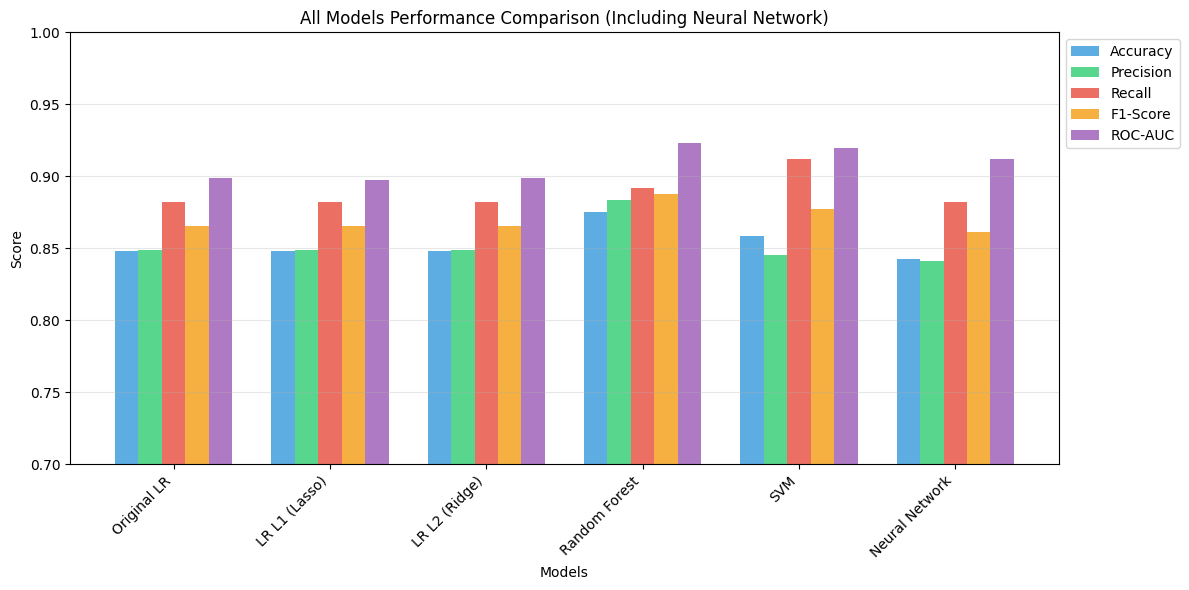

In [38]:
# Compare Neural Network with all other models
print("Final Model Comparison (Including Neural Network)")
print("="*60)

comparison_df = pd.DataFrame(comparison_results)
#remove index 5 from comparison_df
comparison_df = comparison_df.drop(5)
# Add Neural Network to comparison
all_models_comparison = comparison_df.copy()
nn_results = pd.DataFrame([{
    'Model': 'Neural Network',
    'Accuracy': nn_accuracy,
    'Precision': nn_precision,
    'Recall': nn_recall,
    'F1-Score': nn_f1,
    'ROC-AUC': nn_roc_auc
}])
all_models_comparison = pd.concat([all_models_comparison, nn_results], ignore_index=True)

# Display comparison table
print(all_models_comparison.round(4).to_string(index=False))

# Find best model
best_idx = all_models_comparison['ROC-AUC'].idxmax()
best = all_models_comparison.iloc[best_idx]
print(f"\n{'='*60}")
print(f"Best Performing Model: {best['Model']}")
print(f"  ROC-AUC:   {best['ROC-AUC']:.4f}")
print(f"  Accuracy:  {best['Accuracy']:.4f}")
print(f"  F1-Score:  {best['F1-Score']:.4f}")

# Visualize all models including Neural Network
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(all_models_comparison))
width = 0.15
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

for i, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    ax.bar(x + i*width, all_models_comparison[metric], width, label=metric, color=color, alpha=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('All Models Performance Comparison (Including Neural Network)')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(all_models_comparison['Model'], rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim([0.7, 1.0])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
